In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing data

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## data visualisation

In [3]:
data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
data.shape

(18834, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

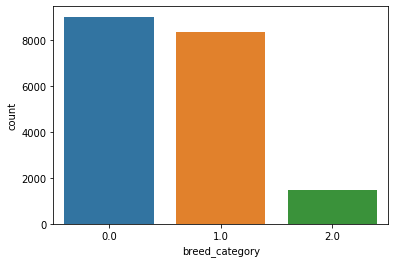

In [7]:
sns.countplot(x = 'breed_category',data = data)

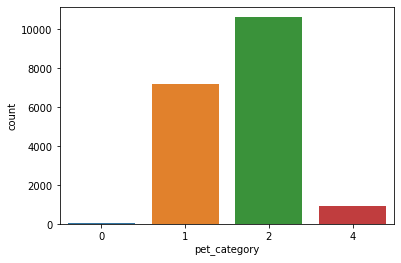

In [8]:
sns.countplot(x ='pet_category',data = data)

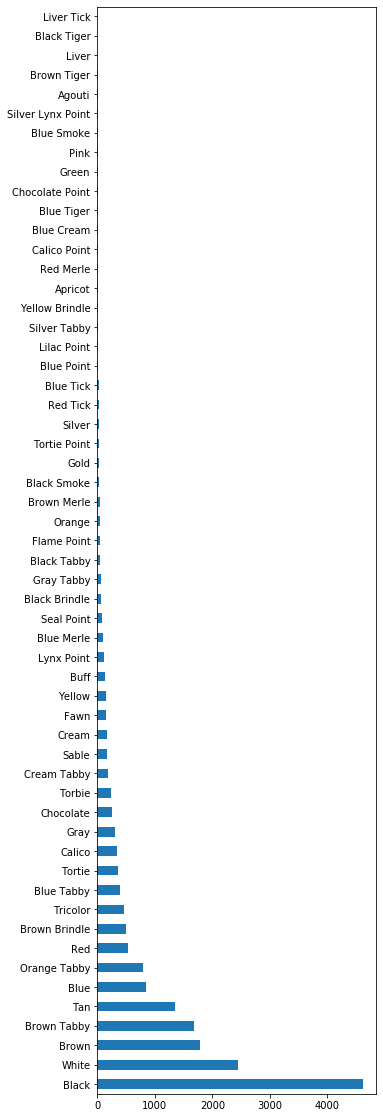

In [10]:
data['color_type'].value_counts().plot(kind = 'barh',figsize = (5,20))

In [11]:
data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [12]:
data.drop(['pet_id','issue_date','listing_date'],inplace = True,axis = 1)

In [13]:
x = data.drop(['breed_category','pet_category'],axis = 1)
breed_cat = data['breed_category']
pet_cat = data['pet_category']


In [14]:
x.head()

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,Brown Tabby,0.80,7.78,13,9
1,1.0,White,0.72,14.19,13,9
2,NaN,Brown,0.15,40.90,15,4
3,1.0,White,0.62,17.82,0,1
4,2.0,Black,0.50,11.06,18,4


In [15]:
#x.drop(['condition'],axis = 1,inplace = True)
x = x.fillna(method ='bfill') 

In [16]:
x.head()

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,Brown Tabby,0.80,7.78,13,9
1,1.0,White,0.72,14.19,13,9
2,1.0,Brown,0.15,40.90,15,4
3,1.0,White,0.62,17.82,0,1
4,2.0,Black,0.50,11.06,18,4


In [17]:
#x['color'] = pd.factorize(x['color_type'])[0]
c = data['color_type']
color_dict = {}
count = 0
for i in range(len(c)):
    if c[i] in color_dict.keys():
        continue
    else:
        color_dict[c[i]] = count
        count += 1
        
print(color_dict)

{'Brown Tabby': 0, 'White': 1, 'Brown': 2, 'Black': 3, 'Red': 4, 'Tricolor': 5, 'Calico': 6, 'Brown Brindle': 7, 'Blue': 8, 'Tortie': 9, 'Gray': 10, 'Fawn': 11, 'Buff': 12, 'Torbie': 13, 'Orange Tabby': 14, 'Sable': 15, 'Tan': 16, 'Blue Tick': 17, 'Orange': 18, 'Blue Tabby': 19, 'Chocolate': 20, 'Black Tabby': 21, 'Black Brindle': 22, 'Cream Tabby': 23, 'Gold': 24, 'Calico Point': 25, 'Blue Merle': 26, 'Red Merle': 27, 'Yellow': 28, 'Lynx Point': 29, 'Blue Cream': 30, 'Flame Point': 31, 'Cream': 32, 'Yellow Brindle': 33, 'Blue Tiger': 34, 'Seal Point': 35, 'Red Tick': 36, 'Brown Merle': 37, 'Black Smoke': 38, 'Gray Tabby': 39, 'Green': 40, 'Tortie Point': 41, 'Blue Smoke': 42, 'Apricot': 43, 'Blue Point': 44, 'Silver Tabby': 45, 'Lilac Point': 46, 'Silver': 47, 'Brown Tiger': 48, 'Liver': 49, 'Agouti': 50, 'Chocolate Point': 51, 'Liver Tick': 52, 'Pink': 53, 'Black Tiger': 54, 'Silver Lynx Point': 55}


In [18]:
def make_column(x):
    result = []
    for i in range(len(x['color_type'])):
        result.append(color_dict[x['color_type'][i]])
    return result

In [19]:
l = make_column(x)
color = pd.DataFrame(l,columns = ['color'])
color

,color
0,0
1,1
2,2
3,1
4,3
...,...
18829,5
18830,2
18831,25
18832,16


In [20]:
x.drop(['color_type'],axis = 1,inplace = True)

In [21]:
x = pd.concat([x,color],axis = 1)
x.head()


,condition,length(m),height(cm),X1,X2,color
0,2.0,0.80,7.78,13,9,0
1,1.0,0.72,14.19,13,9,1
2,1.0,0.15,40.90,15,4,2
3,1.0,0.62,17.82,0,1,1
4,2.0,0.50,11.06,18,4,3


In [22]:
x.tail()

,condition,length(m),height(cm),X1,X2,color
18829,2.0,0.44,27.36,0,1,5
18830,0.0,0.73,14.25,15,4,2
18831,0.0,0.99,28.13,13,9,25
18832,0.0,0.55,44.82,13,9,16
18833,0.0,0.86,37.40,0,1,2


## fitting model with data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [24]:
#x_train1,x_test1,y_train1,y_test1 = train_test_split(x,breed_cat,shuffle = True,test_size = 0.2)
#x_train2,x_test2,y_train2,y_test2 = train_test_split(x,pet_cat,shuffle = True,test_size = 0.2)

In [25]:
def classifier_score(model,x_train,y_train):
    classifier = model
    #classifier.fit(x_train,y_train)
    arr = cross_val_score(classifier,x_train,y_train)
    return np.average(arr)
    #return classifier.score(x_test,y_test)

In [26]:
models = [RandomForestClassifier(),KNeighborsClassifier()]  #AdaBoostClassifier(),SGDClassifier(),SVC(),

In [27]:
results1 = []
results2 = []
for model in models :
    results1.append(classifier_score(model,x,breed_cat))
for model in models :
    results2.append(classifier_score(model,x,pet_cat))

In [49]:
ans = []
for i in range(len(results1)):
    ans.append((results1[i] + results2[i])/2)
ans

[0.8360140561583735, 0.7864229231096953]

In [50]:
print("accuracy ")


[0.8360140561583735, 0.7864229231096953]

In [31]:
test_data.shape

(8072, 9)

In [32]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [33]:
test_data.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [34]:
test_data.fillna(method = 'bfill',inplace = True)

In [35]:
l1 = make_column(test_data)
color1 = pd.DataFrame(l1,columns=['color'])
color1

,color
0,3
1,14
2,3
3,3
4,2
...,...
8067,2
8068,16
8069,3
8070,3


In [36]:
test_data.drop(['pet_id','issue_date','listing_date','color_type'],inplace = True,axis = 1)
test_data = pd.concat([test_data,color1],axis = 1)
test_data.head()

,condition,length(m),height(cm),X1,X2,color
0,0.0,0.87,42.73,0,7,3
1,1.0,0.06,6.71,0,1,14
2,1.0,0.24,41.21,0,7,3
3,1.0,0.29,8.46,7,1,3
4,1.0,0.71,30.92,0,7,2


In [37]:
breed_predicted = clas1.predict(test_data)
pet_predicted  = clas2.predict(test_data)



In [38]:
breed_predicted 

array([1., 0., 0., ..., 1., 2., 1.])

In [39]:
pet_predicted 

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [40]:
test = pd.read_csv('test.csv')

In [41]:
d1 = test['pet_id']
d2 = pd.DataFrame(breed_predicted,columns=['breed_category'])
d3 = pd.DataFrame(pet_predicted,columns=['pet_category'])

In [42]:
ans = pd.concat([d1,d2,d3],axis = 1)

In [43]:
ans.head(25)

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,1
4,ANSL_72871,0.0,2
5,ANSL_64886,1.0,1
6,ANSL_73798,1.0,2
7,ANSL_53131,1.0,2
8,ANSL_66674,0.0,2
9,ANSL_55165,1.0,2


In [44]:
result = ans.to_csv('C:\\Users\\HP\\Desktop\\hackathon\\result2.csv',index = False)